# Kapittel 9 GF

## Stagnasjonsstrøm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Vektorfelt

$$
\vec{v} = Ax \mathbf{i} - Ay \mathbf{j}
$$

Velger domenet $(x, y) \in [-1, 1] \times [0, 2]$ for plotting, men merk at løsningen over gjelder for vilkårlig $x$ og $y$.

In [2]:
A = 1
x, y = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(0, 2, 100), indexing='ij')

## Potensial

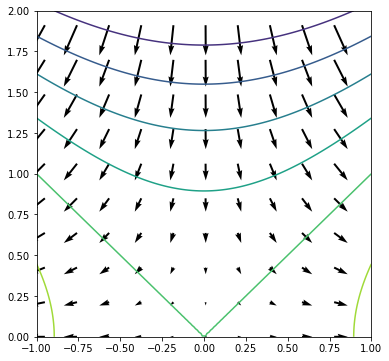

In [3]:
phi = A/2*(x**2-y**2)
plt.figure(figsize=(6, 6))
plt.contour(x, y, phi)
plt.quiver(x[::10, ::10], y[::10, ::10], A*x[::10, ::10], -A*y[::10, ::10], pivot='mid')

## Strømfunksjon

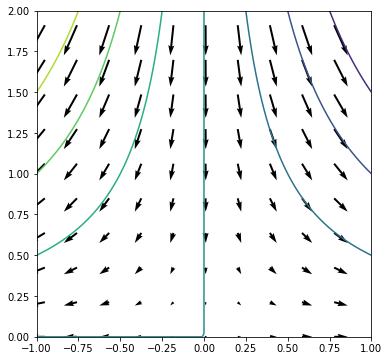

In [4]:
psi = -A*x*y
plt.figure(figsize=(6, 6))
plt.contour(x, y, psi)
plt.quiver(x[::10, ::10], y[::10, ::10], A*x[::10, ::10], -A*y[::10, ::10], pivot='mid')

# Beregn Laplace av strømfunksjon/potensial

Vis at 

$$
\nabla^2 \phi = \nabla^2 \psi = 0
$$

Konstruer Laplace operator først

In [5]:
def div(v, x, y, edge_order=1):
    """Returner divergensen til 2D vektoren v
    
    Parameters
    ----------
    v : liste (av lengde 2) av np.arrays
    x, y : mesh
        Enten numpy arrays (hvis non-uniform) eller spacing (uniform)
        Se numpy.gradient
    edge_order : {1, 2}, optional
        Div beregnes med N-te ordens endelig differanse
        på grensene. Default: 1.
    
    """
    dv0dx = np.gradient(v[0], x, axis=0, edge_order=edge_order)
    dv1dy = np.gradient(v[1], y, axis=1, edge_order=edge_order)
    return dv0dx + dv1dy

def Laplace(u, x, y, edge_order=1):
    """Returner Laplace av u
    
    Parameters
    ----------
    u : 2D numpy array
    x, y : mesh
        Enten numpy arrays (hvis non-uniform) eller spacing (uniform)
        Se numpy.gradient
    edge_order : {1, 2}, optional
        Div beregnes med N-te ordens endelig differanse
        på grensene. Default: 1.
    
    """
    x = x[:, 0] if x.ndim == 2 else x
    y = y[0] if y.ndim == 2 else y
    gradu = np.gradient(u, x, y, edge_order=edge_order)
    return div(gradu, x, y, edge_order=edge_order)

In [6]:
f0 = Laplace(phi, x, y)
print(np.linalg.norm(f0))
f1 = Laplace(psi, x, y)
print(np.linalg.norm(f1))
f2 = Laplace(phi+psi, x, y)
print(np.linalg.norm(f2))

10.97724920005058
1.163049059949887e-11
10.977249200050348


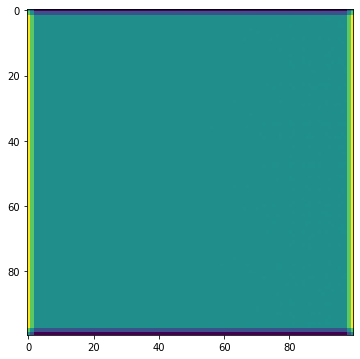

In [7]:
plt.figure(figsize=(6, 6))
plt.imshow(f0)